In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.core.structure import Structure
from pymatgen.electronic_structure import bandstructure as bs
from pymatgen.electronic_structure import plotter as pl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mp_key = "8ChDIqwByRyXhuV8q0dfcUVnIxLTB4o7"
mp_id = "mp-961649"

In [3]:
with MPRester(mp_key) as m:

    # Structure for material id
    structure = m.get_bandstructure_by_material_id(mp_id)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Détermination de la bande interdite

Structure de bande électronique de ZrFeTe :


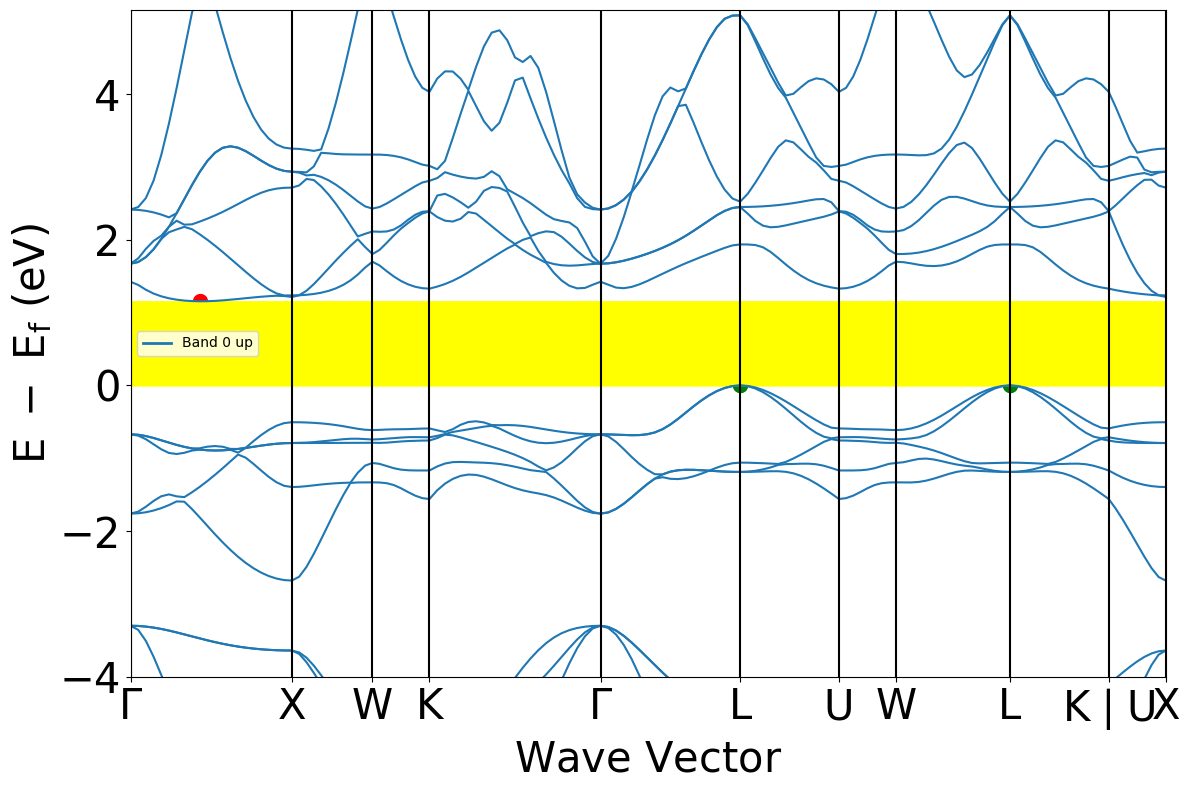

In [4]:
#J'utilise la fonction BSPlotter pour pouvoir afficher le graphe
print("Structure de bande électronique de ZrFeTe :")
bplot = pl.BSPlotter(structure)
bplot.get_plot(vbm_cbm_marker=True)
data= bplot.bs_plot_data()
d = data.get('ticks').get('distance')
plt.fill_between(np.linspace(0,d[-1],1000),data['vbm'][0][1],data['cbm'][0][1],color='yellow')

La bande d'énergie du dessus correspond est la bande de conduction et la bande d'énergie du dessous correspond la bande de valence. 

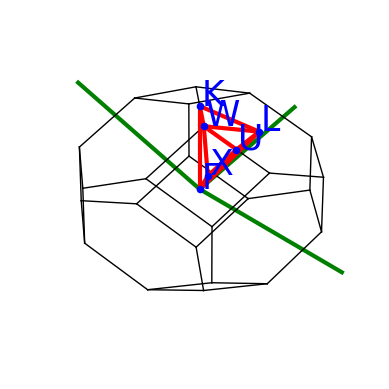

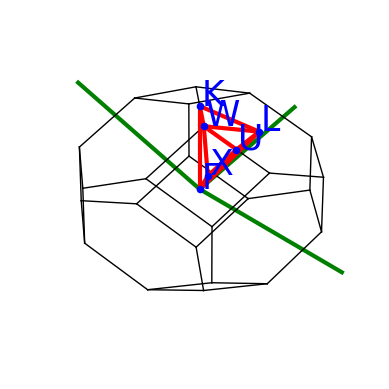

In [5]:
bplot.plot_brillouin()

### Analyse de la bande interdite

La bande interdite est une bande entre la dernière bande de valence et la première bande de conduction où la densité d'état est nulle, ce qui signifie que l'on ne peut pas trouver d'électron dans cette zone. Cette bande interdite se situe donc entre le sommet de la bande de valence et la base de la bande de conduction. Il faut noter que cette bande n'est pas présente dans les conducteurs où la bande de conduction et de valence se chevauchent.

In [6]:
band_gap = structure.get_band_gap()
print(band_gap)
print("\n")
if(band_gap['direct'] == False):
    print("Le gap de la bande interdite est indirecte \nElle vaut "+str(band_gap['energy'])+" eV \nLa transiton: "+str(band_gap['transition'])+".\n")
    
else:
    print("Le gap de la bande interdite d'énergie est directe \nElle vaut "+str(band_gap['energy'])+" eV \nLa transition: "+str(band_gap['transition'])+".\n")
    

{'direct': False, 'energy': 1.155800000000001, 'transition': 'L-(0.214,-0.000,0.214)'}


Le gap de la bande interdite est indirecte 
Elle vaut 1.155800000000001 eV 
La transiton: L-(0.214,-0.000,0.214).



Le caractère directe ou indirecte de la bande interdite corresponde respectivement à une transition directe et indirecte. La transition directe correspond a un vecteur d'onde Δk = 0 (il sera verticale entre les extremums), la transition indirecte correspond a un vecteur d'onde Δk ≠ 0 (il ne sera pas verticale entre les deux extremums des différentes bandes d'énergie).

## Détermination de la dernière bande de valence 

La plus grande dispersion correspond au vecteur d'onde avec la plus grande pente sur un chemin (entre les extrémités du chemin). Une grande courbure correpond à la plus grande dispersion. 
La plus petite dispersion correspond au vecteur d'onde avec la plus petite pente sur un chemin (entre les extrémités du chemin). Une perite courbure correspond à la plus petite dispersion.

In [7]:
Energy = data.get('energy').get('1')
#nombre de noeuds parcourus sur le chemin
Distance = np.unique(data.get('ticks').get('distance'))
vbm = structure.get_vbm()
print("vbm :" , vbm['band_index'])  

vbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})


On obtient que la derniere bande de valence est la 15 ieme. 

In [8]:
Valence_index = 15
#on fait une liste des énergies sur la bande considérée
energie_val = []
parcours = len(Distance)-1
energie_val.append(Energy[0][Valence_index][0])

for i in range(parcours):   
    energie_val.append(Energy[i][Valence_index][-1])
    
pente_val = np.zeros(parcours)

for i in range(parcours):
    pente_val[i] = abs((energie_val[i+1] - energie_val[i])/(Distance[i+1] - Distance[i]))
    
print(pente_val)
#on print la valeur de toutes les pentes du parcours

[0.16114676 0.20982045 0.06170467 0.07358854 0.75135846 0.93512216
 0.06170467 0.84069182 0.93512205 0.23502625]


In [9]:
max_pente_val = max(pente_val) ; min_pente_val = min(pente_val)
index_max_pente_val = int(np.where(pente_val == max_pente_val)[0][0])
index_min_pente_val = int(np.where(pente_val == min_pente_val)[0][0])

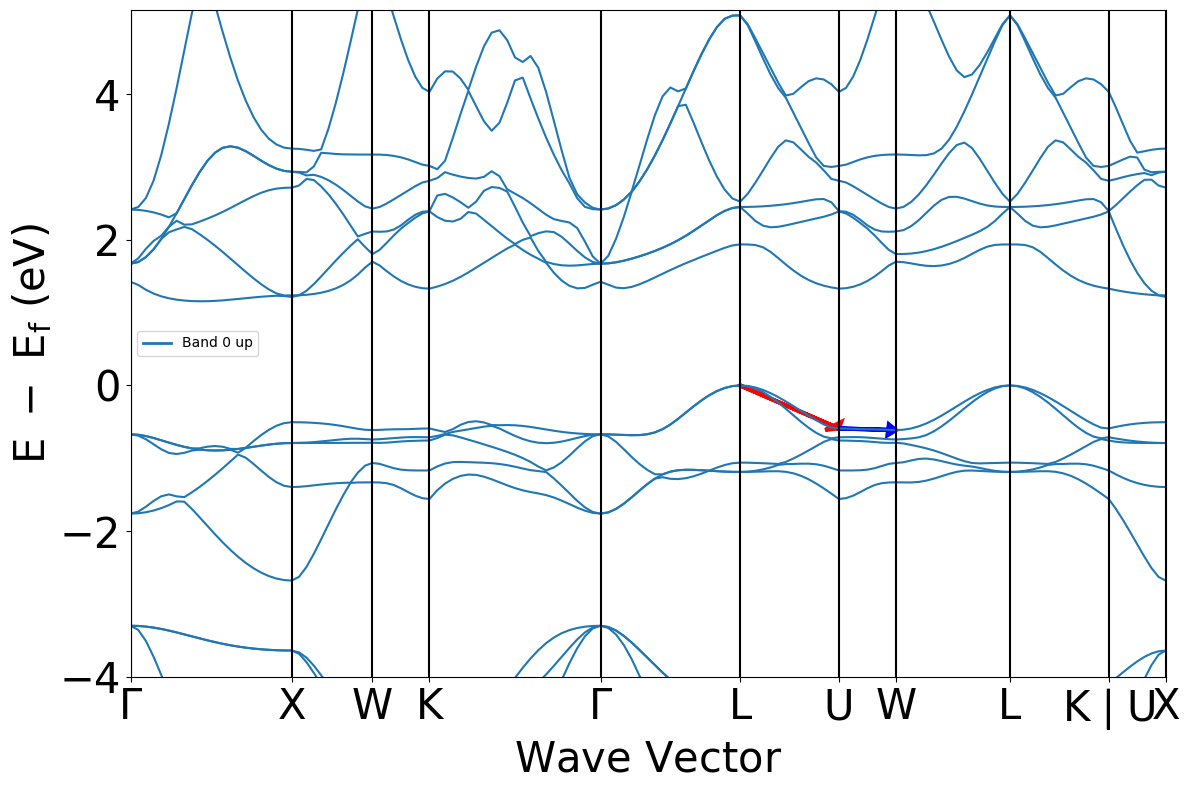

In [10]:
bplot.get_plot()
plt.arrow(Distance[index_max_pente_val], energie_val[index_max_pente_val], Distance[index_max_pente_val + 1] - Distance[index_max_pente_val], energie_val[index_max_pente_val + 1] - energie_val[index_max_pente_val], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Distance[index_min_pente_val], energie_val[index_min_pente_val], Distance[index_min_pente_val + 1] - Distance[index_min_pente_val], energie_val[index_min_pente_val + 1] - energie_val[index_min_pente_val], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.show()

Les fleches représentants les dispersions sont pour la plus grande dispersion -> fleche rouge et la plus petite dispersion -> fleche bleu. Dans notre cas deux pentes minimales sont équivalentes, celle entre W-K et U-W.

## Détermination de la première bande de conduction

In [11]:
cbm = structure.get_cbm()
print("cbm :", cbm['band_index'].values()) 

cbm : dict_values([[16]])


On obtient que la première bande de conduction est la 16 ieme.

In [12]:
Conduction_index = 16
#on fait une liste des énergies sur la bande considérée
energie_cond = []
parcours = len(Distance)-1
energie_cond.append(Energy[0][Conduction_index][0])

for i in range(parcours):   
    energie_cond.append(Energy[i][Conduction_index][-1])
    
pente_cond = np.zeros(parcours)

for i in range(parcours):
    pente_cond[i] = abs((energie_cond[i+1] - energie_cond[i])/(Distance[i+1] - Distance[i]))
    
print(pente_cond)
#on print la valeur de toutes les pentes du parcours

[0.20196673 0.93740486 1.01360212 0.08638655 0.57412699 0.96156398
 1.013602   0.32593777 0.96156387 0.31208854]


In [13]:
max_pente_cond = max(pente_cond) ; min_pente_cond = min(pente_cond)
index_max_pente_cond = int(np.where(pente_cond == max_pente_cond)[0][0])
index_min_pente_cond = int(np.where(pente_cond == min_pente_cond)[0][0])

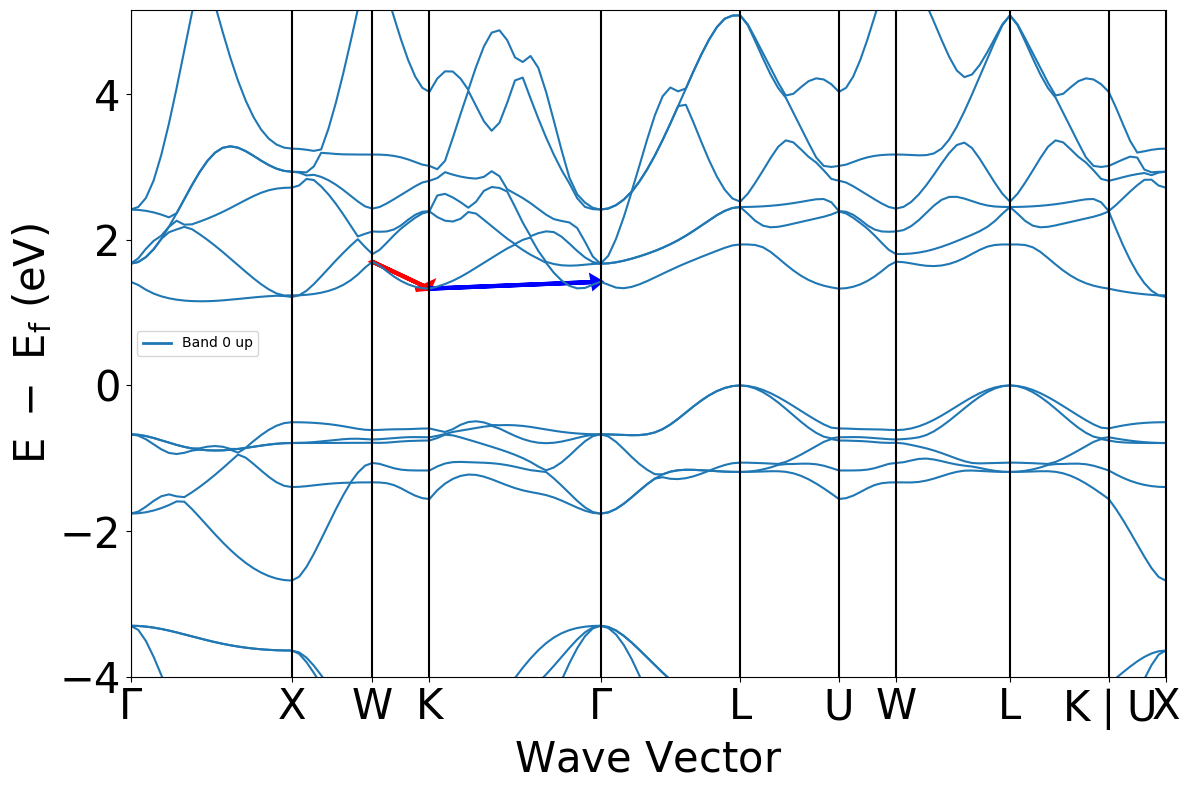

In [14]:
bplot.get_plot()
plt.arrow(Distance[index_max_pente_cond], energie_cond[index_max_pente_cond], Distance[index_max_pente_cond + 1] - Distance[index_max_pente_cond], energie_cond[index_max_pente_cond + 1] - energie_cond[index_max_pente_cond], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(Distance[index_min_pente_cond], energie_cond[index_min_pente_cond], Distance[index_min_pente_cond + 1] - Distance[index_min_pente_cond], energie_cond[index_min_pente_cond + 1] - energie_cond[index_min_pente_cond], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.show()

Les fleches représentants les dispersions sont pour la plus grande dispersion -> fleche rouge (entre W-K) et la plus petite dispersion -> fleche bleu (entre K- Γ).

## Masses effectives en supposant une dispersion parabolique

On peut définir la masse effective de manière générale avec la formule $m_{ij} = \left( \frac{\partial^2 E}{\partial k_i \partial k_j} \right)^{-1}$ . En supposant une dispersion parabolique on peut utiliser l'expression de l'énergie $\ E(k) = ak^2 + bk + c \$

Pour chaque sommet ou base, on prend des coordonnées adjacentes (valeurs voisines assez proches) à ce point afin de faire l'interpolation. Ensuite on peut faire un plot de nos paraboles.

### Interpolation pour trouver les coefficients de la dispersion parabolique

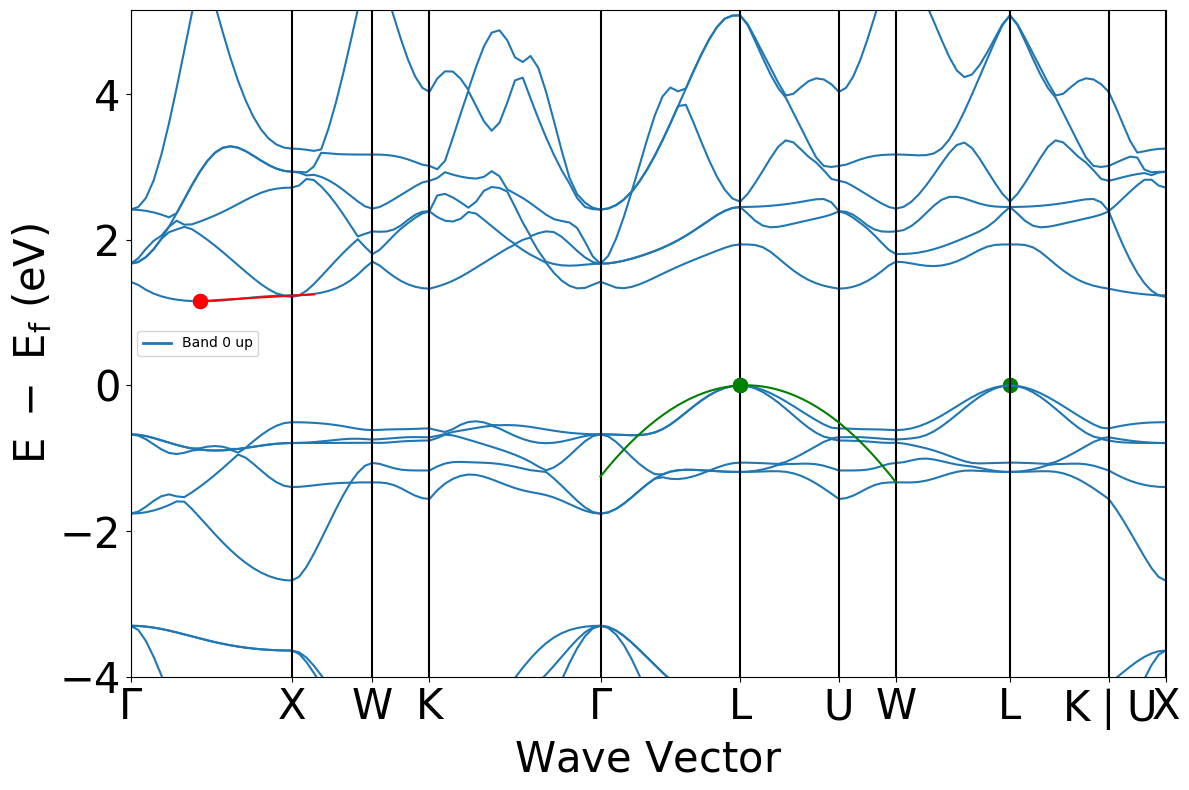

La parabole rouge interpole la première bande de conduction et son équation est : 
-0.02118680657856928k² + 0.1636358411427999k + 1.0876105666744855


La parabole verte interpole la dernière bande de valence et son équation est : 
-1.4475317457766907k² + 11.392729785148255k + -22.41456170100611


In [23]:
Distance =  data.get('distances')
energy = data.get('energy')

hbar = 6.582119570 * 1e-16 #eVs  constante de planck 

Vbm = data.get("vbm")
Cbm = data.get("cbm")
  
bplot.get_plot(vbm_cbm_marker=True)

# marquage des sommets et bases de nos bandes 
(x,y) = Vbm[0]
plt.plot(x,y,'og',markersize=10)


(x, y) = Cbm[0]
plt.plot(x,y,'or',markersize=10)

K = np.zeros(3)
E = np.zeros(3)


K[0], E[0] = Distance[4][-2], energy['1'][4][15][-2]
K[1], E[1] = Vbm[0]
K[2], E[2] = Distance[6][1], energy['1'][6][15][1]


f_vbm = np.polyfit(K, E, 2) 
x = np.linspace(Distance[4][0],Distance[6][-1],1000)
plt.plot(x,np.polyval(f_vbm,x),'g')



K[0], E[0] = Distance[0][-2], energy['1'][0][16][-2] 
K[1], E[1] = Cbm[0] 
K[2], E[2] = Distance[1][2], energy['1'][1][16][2]

#Régression quadratique
f_cbm = np.polyfit(K, E, 2)
x = np.linspace(Distance[0][10],Distance[1][-9],1000)
plt.plot(x,np.polyval(f_cbm,x),'r')

plt.show()

print("La parabole rouge interpole la première bande de conduction et son équation est : \n"+str(f_cbm[0])+"k² + "+str(f_cbm[1])+"k + "+str(f_cbm[2]))
print("\n")

print("La parabole verte interpole la dernière bande de valence et son équation est : \n"+str(f_vbm[0])+"k² + "+str(f_vbm[1])+"k + "+str(f_vbm[2]))

### Détermination de la masse effective

In [24]:
deriveeVbm = 2*f_vbm[0]
deriveeCbm = 2*f_cbm[0]

masseVbm =abs( (hbar**2)/deriveeVbm )
masseCbm = abs( (hbar**2)/deriveeCbm )

print("La masse effective à la première bande de conduction est : " + str(masseCbm) + " kg")
print("La masse effective à la dernière bande de valence est : " + str(masseVbm) + " kg")

La masse effective à la première bande de conduction est : 1.022435775611414e-29 kg
La masse effective à la dernière bande de valence est : 1.4964887008585363e-31 kg
Sans les valeurs absolues j'obtiens des valeurs négatives pour les deux, ce qui semble illogique, la masse effective se trouvant sur le minimum de bande de conduction devrait etre positif, plus la pente est petite, plus la masse effective est grande. Avoir des valeurs négatives signifie que l'électron va dans le sens inverse du sens de la force appliquée.

Une fois avoir trouvé notre fonction de dispersion polynomiale, nous pouvons trouver la dérivée facilement car c'est une parabole, et ainsi avec la définition notre masse effective. 